In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [153]:
df=pd.read_csv("database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [155]:
df.shape

(907, 27)

In [156]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [158]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [159]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [160]:
df.drop(columns=['latitude','longitude'],inplace=True)

In [161]:
df.drop(columns=['other_fuel1','other_fuel2','other_fuel3','wepp_id','owner','commissioning_year','generation_gwh_2013','generation_gwh_2019','geolocation_source','country','country_long','name','gppd_idnr','estimated_generation_gwh','generation_data_source','year_of_capacity_data'],inplace=True)

In [162]:
df.isnull().sum()

capacity_mw              0
primary_fuel             0
source                   0
url                      0
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [163]:
for col in df.columns:
    if col not in ['country','country_long','name','gppd_idnr','capacity_mw','primary_fuel','source','url']:
        df[col]=df[col].replace(np.nan,df[col].median())

In [164]:
df.isnull().sum()

capacity_mw            0
primary_fuel           0
source                 0
url                    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [115]:
df_fuel=df.primary_fuel.value_counts().head(20)
df_fuel

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

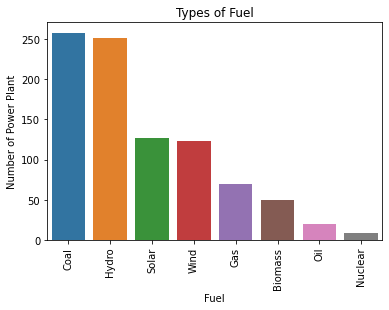

In [116]:
sns.barplot(x = df_fuel.index, y = df_fuel)
plt.xticks(rotation = 90)
plt.title('Types of Fuel')
plt.ylabel('Number of Power Plant')
plt.xlabel('Fuel');

In [117]:
main_primary_fuel = df.primary_fuel.value_counts() * 100 / df.primary_fuel.count()
main_primary_fuel

Coal       28.445424
Hydro      27.673649
Solar      14.002205
Wind       13.561191
Gas         7.607497
Biomass     5.512679
Oil         2.205072
Nuclear     0.992282
Name: primary_fuel, dtype: float64

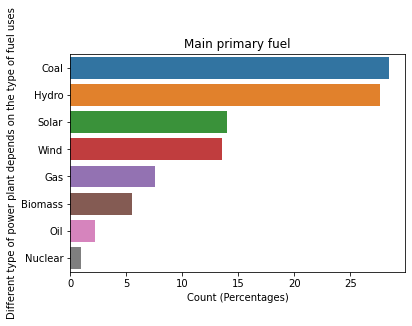

In [118]:
sns.barplot(x = main_primary_fuel, y = main_primary_fuel.index)
plt.title('Main primary fuel')
plt.xlabel('Count (Percentages)');
plt.ylabel('Different type of power plant depends on the type of fuel uses');

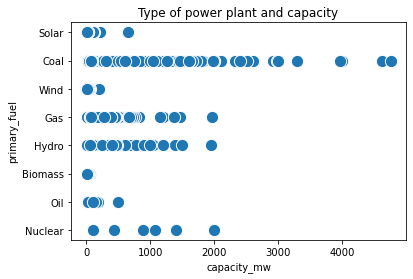

In [119]:
sns.scatterplot(x = df.capacity_mw, y =df.primary_fuel, s = 150)
plt.title('Type of power plant and capacity');

In [120]:
est_gen_2014 = df.groupby('primary_fuel')[['generation_gwh_2014']].sum().sort_values('generation_gwh_2014', ascending = False)
est_gen_2014_UIA = est_gen_2014[est_gen_2014.index.isin(['Biomass','Coal', 'Gas', 'Hydro','Nuclear','Oil','Solar','Wind'])]
est_gen_2014_UIA

,generation_gwh_2014
primary_fuel,
Coal,840410.975095
Hydro,197646.876295
Solar,101742.719425
Wind,98538.224325
Gas,52917.856782
Biomass,40056.188750
Nuclear,35675.140700
Oil,8649.809001


In [121]:
est_gen_2015 = df.groupby('primary_fuel')[['generation_gwh_2015']].sum().sort_values('generation_gwh_2015', ascending = False)
est_gen_2015_UIA = est_gen_2015[est_gen_2015.index.isin(['Biomass','Coal', 'Gas', 'Hydro','Nuclear','Oil','Solar','Wind'])]
est_gen_2015_UIA

,generation_gwh_2015
primary_fuel,
Coal,880582.357200
Hydro,178302.999625
Solar,90320.015575
Wind,87475.290675
Gas,56165.317802
Biomass,35559.061250
Nuclear,34590.181225
Oil,6639.441968


In [122]:
est_gen_2016 = df.groupby('primary_fuel')[['generation_gwh_2016']].sum().sort_values('generation_gwh_2016', ascending = False)
est_gen_2016_UIA = est_gen_2016[est_gen_2016.index.isin(['Biomass','Coal', 'Gas', 'Hydro','Nuclear','Oil','Solar','Wind'])]
est_gen_2016_UIA

,generation_gwh_2016
primary_fuel,
Coal,922572.192310
Hydro,178408.277990
Solar,93625.092150
Wind,90676.270350
Gas,56034.979113
Biomass,36860.272500
Nuclear,34918.075450
Oil,6687.614634


In [123]:
est_gen_2017 = df.groupby('primary_fuel')[['generation_gwh_2017']].sum().sort_values('generation_gwh_2017', ascending = False)
est_gen_2017_UIA = est_gen_2017[est_gen_2017.index.isin(['Biomass','Coal', 'Gas', 'Hydro','Nuclear','Oil','Solar','Wind'])]
est_gen_2017_UIA

,generation_gwh_2017
primary_fuel,
Coal,968866.857110
Hydro,182727.453095
Solar,103883.110750
Wind,100611.201750
Gas,59981.810731
Biomass,40898.862500
Nuclear,35405.297250
Oil,10634.876549


In [124]:
est_gen_2018 = df.groupby('primary_fuel')[['generation_gwh_2018']].sum().sort_values('generation_gwh_2018', ascending = False)
est_gen_2018_UIA = est_gen_2018[est_gen_2018.index.isin(['Biomass','Coal', 'Gas', 'Hydro','Nuclear','Oil','Solar','Wind'])]
est_gen_2018_UIA

,generation_gwh_2018
primary_fuel,
Coal,999462.185586
Hydro,186099.288738
Solar,95458.835625
Wind,92452.258125
Gas,57374.276391
Biomass,37582.218750
Nuclear,34967.894375
Oil,6768.046735


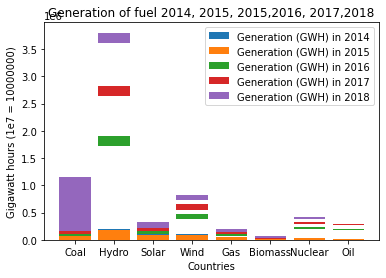

In [126]:
plt.bar(est_gen_2014_UIA.index, est_gen_2014_UIA.generation_gwh_2014)
plt.bar(est_gen_2015_UIA.index, est_gen_2015_UIA.generation_gwh_2015, bottom = est_gen_2013_UIA.generation_gwh_2013 + est_gen_2014_UIA.generation_gwh_2014)
plt.bar(est_gen_2016_UIA.index, est_gen_2016_UIA.generation_gwh_2016, bottom = est_gen_2013_UIA.generation_gwh_2013 + est_gen_2014_UIA.generation_gwh_2014 + est_gen_2015_UIA.generation_gwh_2015 )
plt.bar(est_gen_2017_UIA.index, est_gen_2017_UIA.generation_gwh_2017, bottom = est_gen_2013_UIA.generation_gwh_2013 + est_gen_2014_UIA.generation_gwh_2014 + est_gen_2015_UIA.generation_gwh_2015 + est_gen_2016_UIA.generation_gwh_2016)
plt.bar(est_gen_2018_UIA.index, est_gen_2018_UIA.generation_gwh_2018, bottom = est_gen_2013_UIA.generation_gwh_2013 + est_gen_2014_UIA.generation_gwh_2014 + est_gen_2015_UIA.generation_gwh_2015 + est_gen_2016_UIA.generation_gwh_2016 + est_gen_2017_UIA.generation_gwh_2017 )

plt.legend(['Generation (GWH) in 2014', 'Generation (GWH) in 2015', 'Generation (GWH) in 2016', 'Generation (GWH) in 2017','Generation (GWH) in 2018'])
plt.title('Generation of fuel 2014, 2015, 2015,2016, 2017,2018')
plt.xlabel('Countries')
plt.ylabel('Gigawatt hours (1e7 = 10000000)');

In [127]:
renewable_energy = df[df.primary_fuel.isin(['Hydro', 'Wind', 'Solar', 'Biomass', 'Wave and Tidal', 'Geothermal', 'Storage'])]
number_of_renewable_energy = renewable_energy.primary_fuel.value_counts()
number_of_renewable_energy

Hydro      251
Solar      127
Wind       123
Biomass     50
Name: primary_fuel, dtype: int64

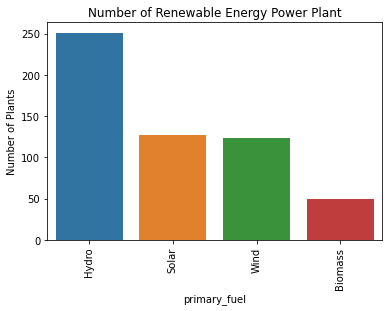

In [128]:
sns.barplot(x = number_of_renewable_energy.index, y = number_of_renewable_energy)
plt.xticks(rotation = 90)
plt.title('Number of Renewable Energy Power Plant')
plt.ylabel('Number of Plants')
plt.xlabel('primary_fuel');

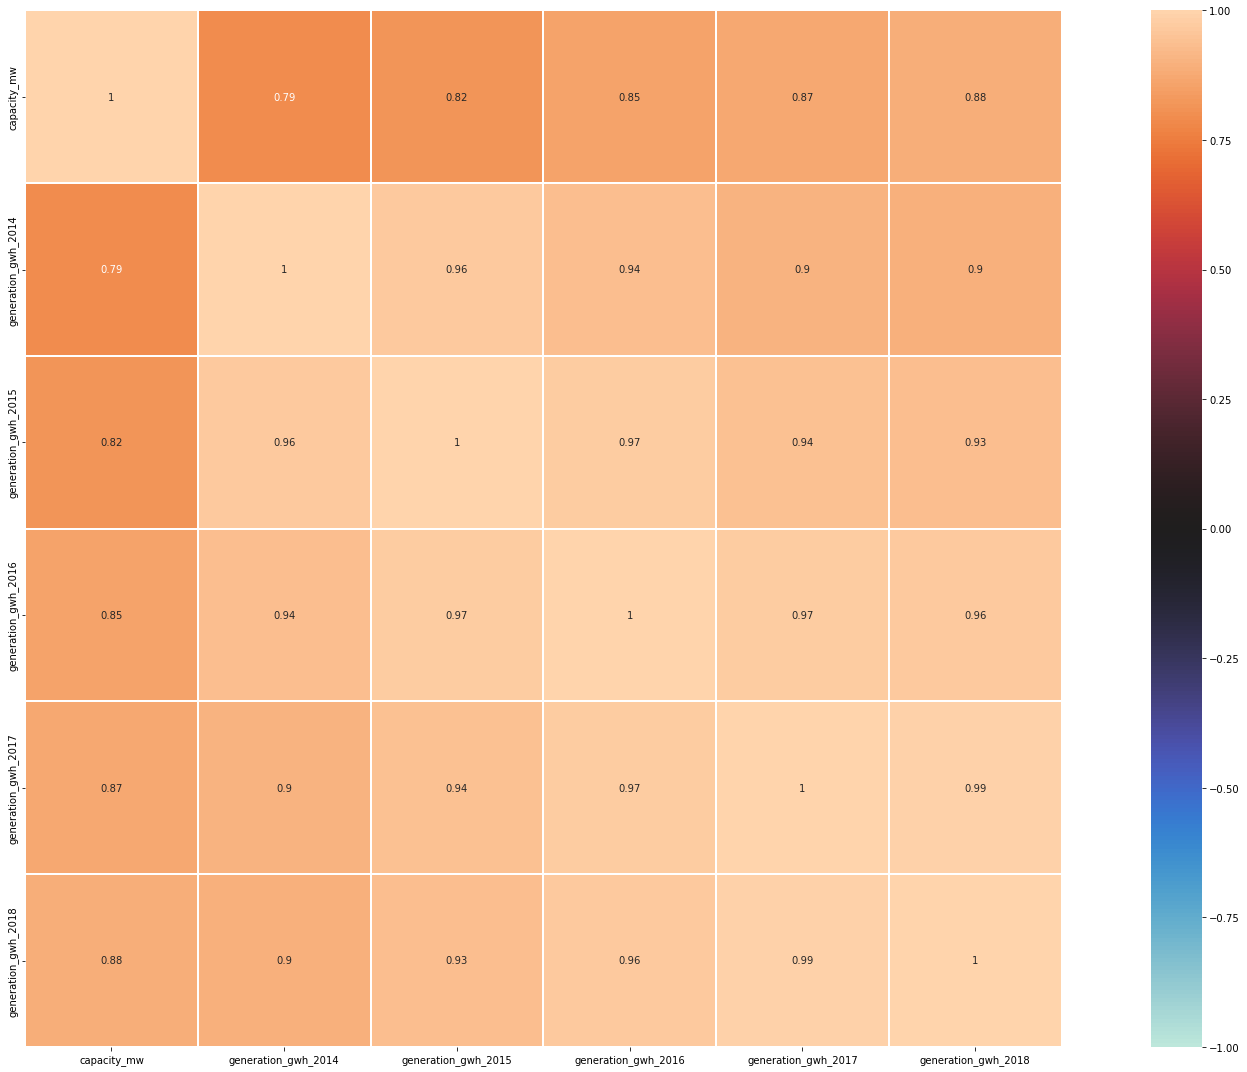

In [129]:
df_corr=df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()


In [165]:
X = df.drop(columns=['primary_fuel','capacity_mw'], axis=1)
Y = df['capacity_mw']

In [166]:
print(X)

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                                                   url  generation_gwh_2014  \
0    http://www.nrel.gov/csp/solarpaces/project_det...           801.123775   
1                      http://www.ultratechcement.com/           801.123775   
2    https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...           801.123775   
3                               http://www.cea.nic.in/           617.789264   
4                               http://www.cea.nic.in/          

In [133]:
print(Y)

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64


In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [137]:
print(X.shape, X_train.shape, X_test.shape)

(907, 11) (725, 11) (182, 11)


In [138]:
# loading the model
model = XGBRegressor()

In [139]:
model.fit(X_train, Y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:country: object, country_long: object, name: object, gppd_idnr: object, source: object, url: object